In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
# read the data
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/german-credit.csv")
bad_loan = df['good.loan'] - 1

In [9]:
# use only numeric data, and scale it
df = df[["duration.in.months", "amount", "percentage.of.disposable.income", "at.residence.since", 
              "age.in.years", "num.credits.at.bank"]]
X = df.apply(zscore).values
y = bad_loan.values


In [10]:
#Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
# see how knn classifier works as training size changes

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
te_errs = []
tr_errs = []
tr_sizes = np.linspace(100, X_train.shape[0], 10).astype(int)

for tr_size in tr_sizes:
  X_train1 = X_train[:tr_size,:]
  y_train1 = y_train[:tr_size]
  
  # train model on a subset of the training data
  knn.fit(X_train1, y_train1)

  # error on subset of training data
  tr_predicted = knn.predict(X_train1)
  err = (tr_predicted != y_train1).mean()
  tr_errs.append(err)
  
  # error on all test data
  te_predicted = knn.predict(X_test)
  err = (te_predicted != y_test).mean()
  te_errs.append(err)

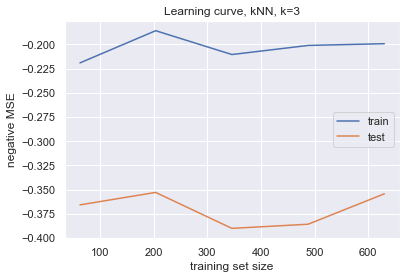

In [18]:
#
# plot the learning curve here
#
from sklearn.model_selection import learning_curve
import seaborn as sns
sns.set_theme()

train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='train')
plt.plot(train_sizes, test_scores_mean, label='test')
plt.xlabel('training set size')
plt.ylabel('negative MSE')
plt.title('Learning curve, kNN, k=' + str(k))
plt.legend()